# Regularización en Machine Learning

<a target="_blank" href="https://colab.research.google.com/github/griverat/Meteo-AI/blob/main/notebooks/3.regularization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Si usa Google Colab, asegúrese de tener habilitada la GPU para este notebook.**

![gpu_colab](https://github.com/griverat/Meteo-AI/blob/main/images/colab_gpu.png?raw=1)

## Descripción

En este notebook vamos a ver cómo la regularización puede ayudar a mejorar el rendimiento de un modelo de Machine Learning. Para ello, vamos a utilizar un dataset de ejemplo y vamos a entrenar un modelo sin regularización y otro con regularización, explorando cómo se comportan ambos modelos.

## Objetivos

- Entender qué es la regularización y cómo se aplica en Machine Learning.
- Comparar distintos mecanismos de regularización.
- Entrenar un modelo con y sin regularización.

---

## ¿Qué es la regularización?

La regularización es una técnica utilizada en Machine Learning para evitar el sobreajuste de los modelos. El sobreajuste ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, lo que puede llevar a que el modelo tenga un rendimiento deficiente en datos nuevos o no vistos.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1280px-Overfitting.svg.png" width="400"></img>

La línea verde representa un modelo sobreajustado y la línea negra representa un modelo regularizado. Si bien la línea verde sigue mejor los datos de entrenamiento, depende demasiado de esos datos y es probable que tenga una tasa de error más alta en datos nuevos no vistos, ilustrados por puntos delineados en negro, en comparación con la línea negra.


Existen diferentes métodos de regularización que se pueden aplicar a los modelos de aprendizaje automático. Dos de los métodos más comunes son la regularización L1 y la regularización L2.

La regularización L1, también conocida como regularización de Lasso, agrega una penalización a la función de costo del modelo basada en la suma de los valores absolutos de los coeficientes del modelo. Esto tiene el efecto de forzar algunos coeficientes a cero, lo que puede conducir a la selección automática de características y simplificación del modelo.

La regularización L2, también conocida como regularización de Ridge, agrega una penalización a la función de costo del modelo basada en la suma de los cuadrados de los coeficientes del modelo. Esto tiene el efecto de reducir los valores de los coeficientes, lo que puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo.

Además de la regularización L1 y L2, también existen otros métodos de regularización, como la elastic net, que combina las penalizaciones de L1 y L2, y la regularización de dropout, que apaga aleatoriamente algunas neuronas durante el entrenamiento para evitar la dependencia excesiva de ciertas características.

La regularización es especialmente útil cuando se trabaja con conjuntos de datos pequeños o cuando hay una alta dimensionalidad de características. Al agregar una penalización a la función de costo, la regularización ayuda a controlar la complejidad del modelo y a evitar el sobreajuste, lo que puede resultar en modelos más estables y con mejor rendimiento en datos nuevos.

En resumen, la regularización es una técnica importante en el aprendizaje automático que ayuda a evitar el sobreajuste y mejorar la generalización del modelo. Al aplicar una penalización a la función de costo, la regularización controla la complejidad del modelo y promueve la selección de características relevantes, lo que puede conducir a modelos más estables y con mejor rendimiento en datos nuevos.

y = Wx + b

## Regularización en Tensorflow

La regularización implementada en tensorflow, mediante la interfaz de Keras, es aplicada independientemente por capas. Esto indica que dependiendo de como nos gustase configurar el modelo, podemos escoger distintas formas de regularización con distintas intensidades para cada capa de nuestro modelo.

En Keras, existen tres tipos de regularización que se pueden aplicar a las capas de un modelo: regularización del kernel, regularización del bias y regularización de la actividad.

1. Regularización del kernel:
La regularización del kernel se aplica a los pesos de las conexiones entre las neuronas de una capa. Ayuda a controlar la complejidad del modelo penalizando los valores grandes de los pesos. Esto se logra mediante la adición de una penalización a la función de pérdida del modelo. La regularización del kernel se puede utilizar para evitar el sobreajuste y mejorar la generalización del modelo.

2. Regularización del bias:
La regularización del bias se aplica a los términos de sesgo de las neuronas de una capa. Al igual que la regularización del kernel, la regularización del bias ayuda a controlar la complejidad del modelo y evitar el sobreajuste. Se puede utilizar para reducir la dependencia excesiva de ciertas características y mejorar la capacidad de generalización del modelo.

3. Regularización de la actividad:
La regularización de la actividad se aplica a la salida de una capa. Ayuda a controlar la magnitud de las activaciones de las neuronas, evitando así valores extremadamente grandes o pequeños. Esto puede ser útil para evitar la saturación de las funciones de activación y mejorar la estabilidad del modelo.

Para aplicar la regularización en Keras, se pueden utilizar diferentes técnicas, como la regularización L1, la regularización L2 o la regularización de dropout. Estas técnicas se pueden especificar al definir una capa en Keras, utilizando los parámetros correspondientes, como `kernel_regularizer`, `bias_regularizer` y `activity_regularizer`.

```python
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                 bias_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])
```

En este ejemplo, se utiliza la regularización L2 con un factor de penalización de 0.01 para la regularización del kernel, el bias y la actividad de la capa densa. Esto ayudará a controlar la complejidad del modelo y evitar el sobreajuste.

### Implementación

Para demostrar el efecto de la regularización en un modelo de Machine Learning, vamos a utilizar un dataset sintético creado usando `sklearn` para entrenar un modelo clasificación binaria. Al usar un set de datos sintético, podemos controlar el nivel de ruido y la complejidad del problema, lo que nos permitirá ver cómo la regularización actúa realmente

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_circles

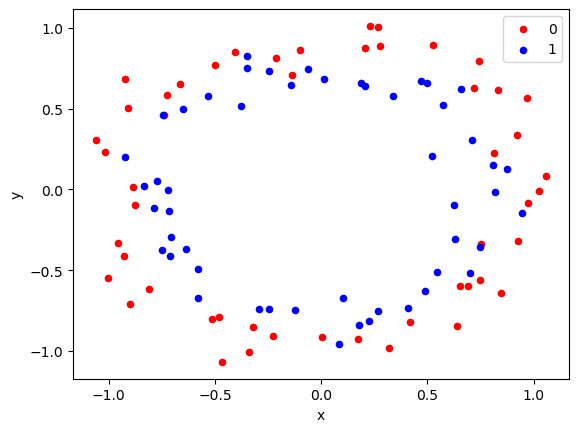

In [2]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], label=y))
colors = {0: "red", 1: "blue"}

fig, ax = plt.subplots()
grouped = df.groupby("label")
for key, group in grouped:
    group.plot(ax=ax, kind="scatter", x="x", y="y", label=key, color=colors[key])

Como siempre, antes de comenzar a definir los modelos a usar, debemos separar nuestros datos en al menos dos conjuntos: uno de entrenamiento y otro de prueba. Para este ejemplo vamos a exagerar y usar 30 ejemplos para entrenar y 70 para probar.



In [3]:
x_train, x_test = x[:30], x[30:]
y_train, y_test = y[:30], y[30:]

## Sobreajuste de perceptrón multicapa

Vamos a desarrollar un perceptrón multicapa para resolver este problema de clasificación binaria. El modelo tendrá una sola capa con más neuronas de las necesarias para resolver el problema, lo que lo hará propenso a sobreajustarse a los datos de entrenamiento. Adicionalmente, entrenaremos el modelo durante un número de épocas mayor al necesario para que el sobreajuste sea más evidente.


In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,)))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/dangomelon/mambaforge/envs/meteo_ai/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

El modelo definido va a set entrenado por 4000 epocas con un batch size de 32

In [6]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0
)

Podemos revisar las métricas de entrenamiento, en donde se nota claramente como el modelo se ajusta a los datos de entrenamiento, pero no logra generalizar bien a los datos de prueba.

Text(0.5, 1.0, 'accuracy')

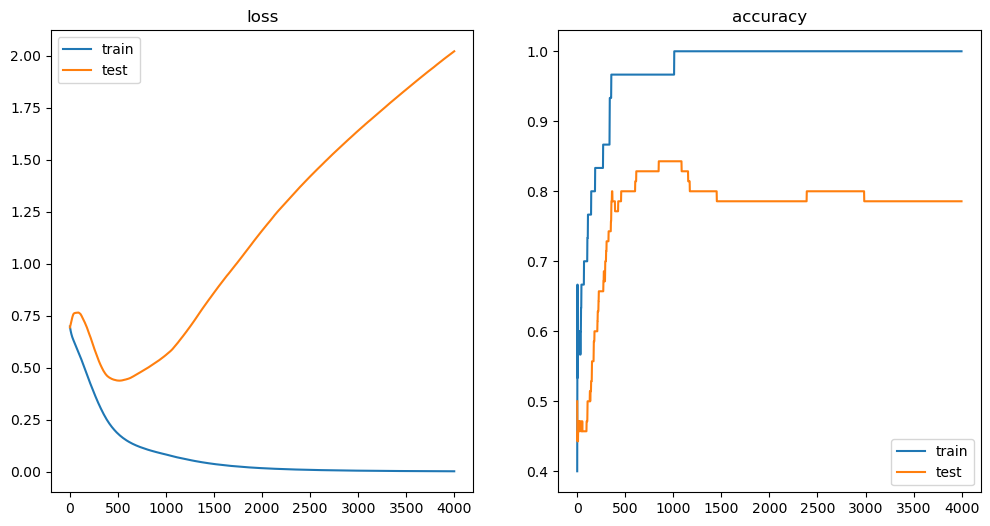

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["accuracy"], label="train")
ax[1].plot(history.history["val_accuracy"], label="test")
ax[1].legend()
ax[1].set_title("accuracy")

Podemos visualizar la frontera de decisión del modelo, la cual se ajusta muy bien a los datos de entrenamiento, pero no logra generalizar bien a los datos de prueba.

4896/4896 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step


Text(0.5, 1.0, 'test')

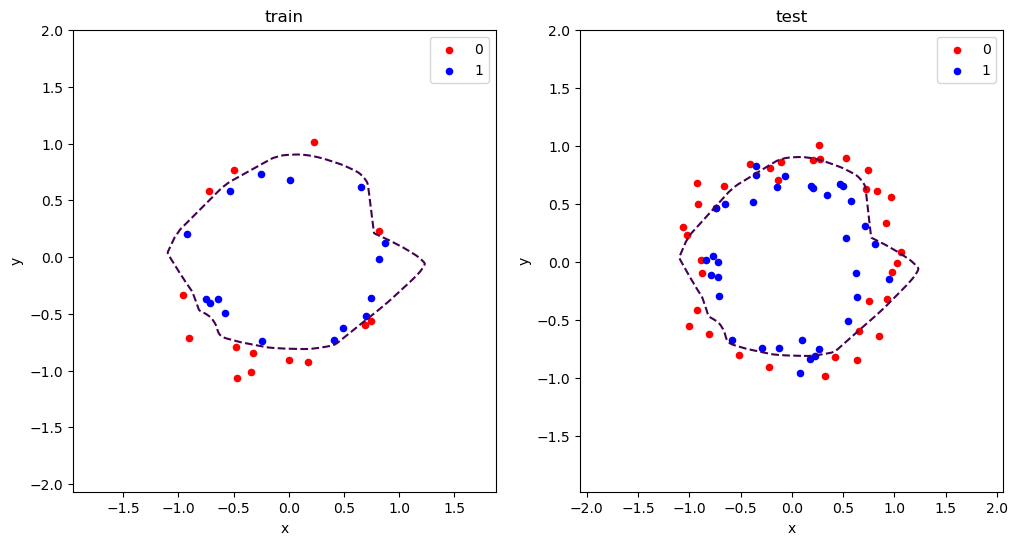

In [8]:
grouded_train = pd.DataFrame(dict(x=x_train[:, 0], y=x_train[:, 1], label=y_train))
grouped_test = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], label=y_test))
grouped_train = grouded_train.groupby("label")
grouped_test = grouped_test.groupby("label")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for key, group in grouped_train:
    group.plot(ax=axs[0], kind="scatter", x="x", y="y", label=key, color=colors[key])
for key, group in grouped_test:
    group.plot(ax=axs[1], kind="scatter", x="x", y="y", label=key, color=colors[key])

for dset, ax in zip([x_train, x_test], axs):
    x_min, x_max = dset[:, 0].min() - 1, dset[:, 0].max() + 1
    y_min, y_max = dset[:, 1].min() - 1, dset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0.5], linestyles="dashed")

axs[0].set_title("train")
axs[1].set_title("test")

In [9]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Train: {train_acc:.1%}, Test: {test_acc:.1%}")

Train: 100.0%, Test: 78.6%


## Regularización en el modelo sobreajustado

Ahora vamos a ver como los distinto algoritmos de regularización pueden ayudar a mejorar el rendimiento del modelo. Para ello, vamos a entrenar el mismo modelo, pero con regularización L1 y L2 en las capas densas.

Para comenzar, debemos usar una activación lineal en la capa densa de la red, ya que queremos aplicar la regularización sobre los datos en crudo, antes de pasar por la función de activación.


$g(y = Wx+b)$

g = funcion no lineal (ReLU)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,)))
model.add(
    tf.keras.layers.Dense(
        500, activation="linear", activity_regularizer=tf.keras.regularizers.l1(0.0001)
    )
)
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/dangomelon/mambaforge/envs/meteo_ai/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 500)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

Ahora realizamos el entrenamiento para evaluar el cambio en el rendimiento del modelo.

In [12]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0
)

Text(0.5, 1.0, 'accuracy')

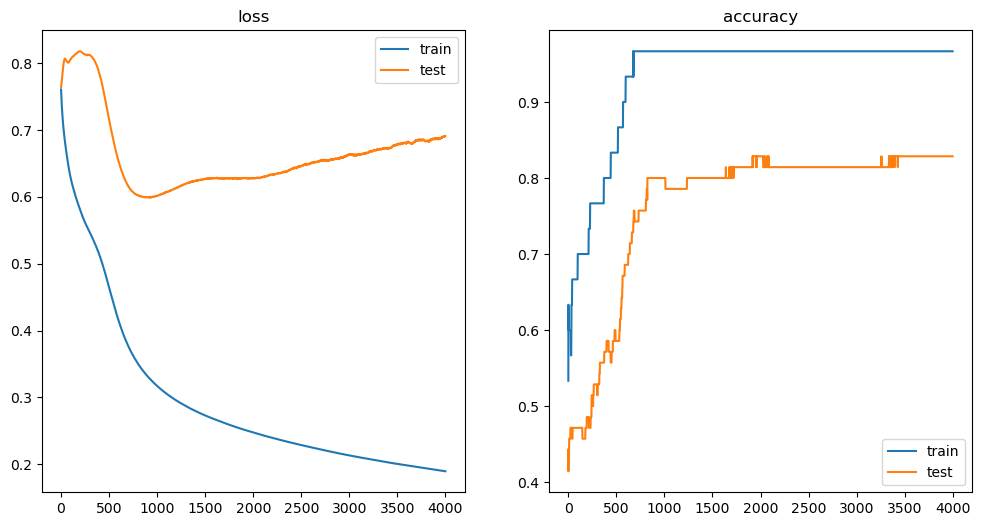

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["accuracy"], label="train")
ax[1].plot(history.history["val_accuracy"], label="test")
ax[1].legend()
ax[1].set_title("accuracy")

In [14]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Train: {train_acc:.1%}, Test: {test_acc:.1%}")

Train: 96.7%, Test: 82.9%


4896/4896 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step


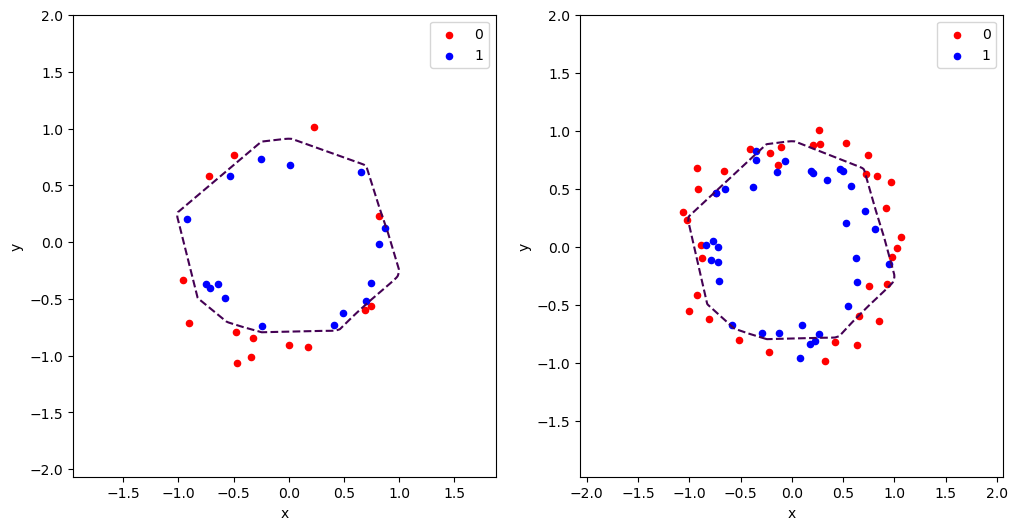

In [15]:
grouded_train = pd.DataFrame(dict(x=x_train[:, 0], y=x_train[:, 1], label=y_train))
grouped_test = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], label=y_test))
grouped_train = grouded_train.groupby("label")
grouped_test = grouped_test.groupby("label")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for key, group in grouped_train:
    group.plot(ax=axs[0], kind="scatter", x="x", y="y", label=key, color=colors[key])
for key, group in grouped_test:
    group.plot(ax=axs[1], kind="scatter", x="x", y="y", label=key, color=colors[key])

for dset, ax in zip([x_train, x_test], axs):
    x_min, x_max = dset[:, 0].min() - 1, dset[:, 0].max() + 1
    y_min, y_max = dset[:, 1].min() - 1, dset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0.5], linestyles="dashed")

De manera similar, podemos hacer uso de la regularización L2 en la capa densa para ver cómo afecta al rendimiento del modelo.

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,)))
model.add(
    tf.keras.layers.Dense(
        500, activation="linear", activity_regularizer=tf.keras.regularizers.l2(0.0001)
    )
)
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/dangomelon/mambaforge/envs/meteo_ai/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Ahora realizamos el entrenamiento para evaluar el cambio en el rendimiento del modelo.

In [17]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0
)

Text(0.5, 1.0, 'accuracy')

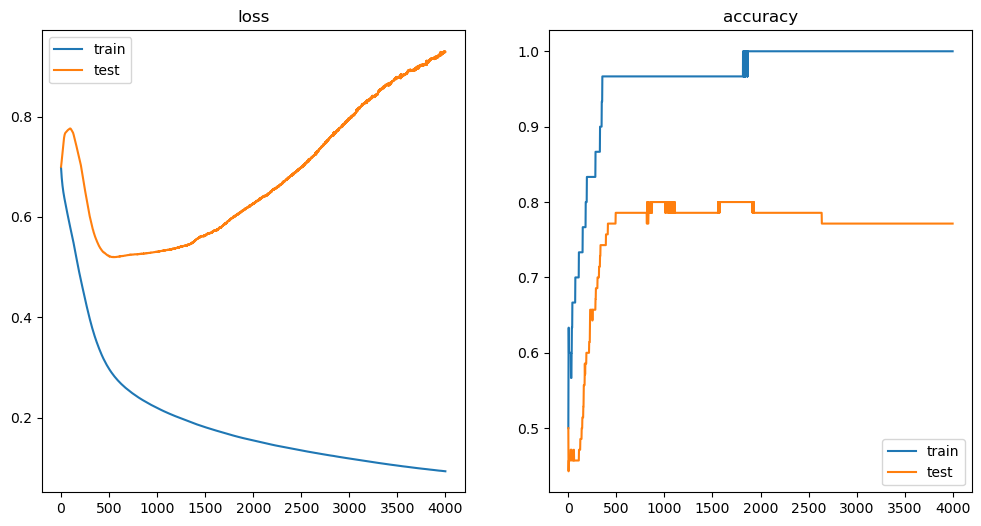

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["accuracy"], label="train")
ax[1].plot(history.history["val_accuracy"], label="test")
ax[1].legend()
ax[1].set_title("accuracy")

In [19]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Train: {train_acc:.1%}, Test: {test_acc:.1%}")

Train: 100.0%, Test: 77.1%


4896/4896 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step


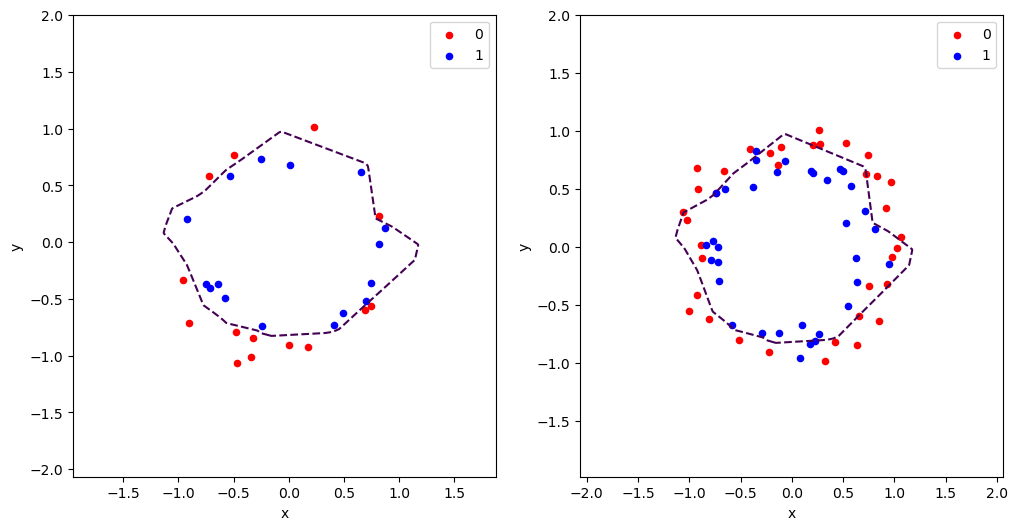

In [20]:
grouded_train = pd.DataFrame(dict(x=x_train[:, 0], y=x_train[:, 1], label=y_train))
grouped_test = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], label=y_test))
grouped_train = grouded_train.groupby("label")
grouped_test = grouped_test.groupby("label")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for key, group in grouped_train:
    group.plot(ax=axs[0], kind="scatter", x="x", y="y", label=key, color=colors[key])
for key, group in grouped_test:
    group.plot(ax=axs[1], kind="scatter", x="x", y="y", label=key, color=colors[key])

for dset, ax in zip([x_train, x_test], axs):
    x_min, x_max = dset[:, 0].min() - 1, dset[:, 0].max() + 1
    y_min, y_max = dset[:, 1].min() - 1, dset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0.5], linestyles="dashed")

Podemos verificar que pese a usar regularizacion L2 para este problema, el modelo sigue sobreajustando los datos de entrenamiento, indicando que es mejor cortar las conexiones con la regularización L1 que reducir su peso con la regularización L2.

### Ejercicio

Hemos realizado pruebas con el regularizador L1 y L2, ahora te toca a ti implementar la regularización ElasticNet (combinación de L1 y L2) para ver cómo afecta al rendimiento del modelo.

Keras proprociona la función `regularizers.L1L2`, la cual toma como parámetros `l1` y `l2`, los cuales son los factores de penalización para la regularización L1 y L2, respectivamente.

```python
tf.keras.regularizers.L1L2(l1=0.0, l2=0.0)
```

In [21]:
# code here
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,)))
model.add(
    tf.keras.layers.Dense(
        500, activation="linear", activity_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.001)
    )
)
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/dangomelon/mambaforge/envs/meteo_ai/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [22]:
history = model.fit(
    x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0
)

Text(0.5, 1.0, 'accuracy')

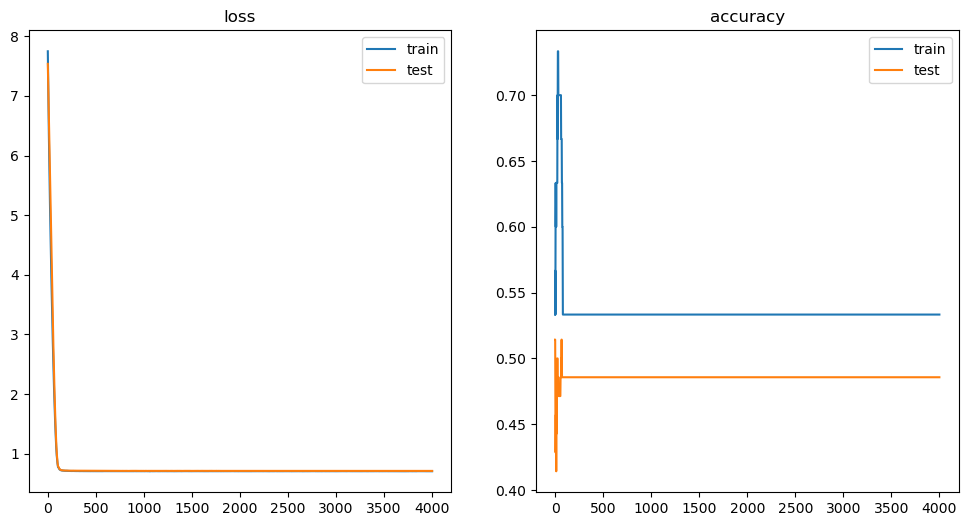

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["accuracy"], label="train")
ax[1].plot(history.history["val_accuracy"], label="test")
ax[1].legend()
ax[1].set_title("accuracy")

In [24]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Train: {train_acc:.1%}, Test: {test_acc:.1%}")

Train: 53.3%, Test: 48.6%


4896/4896 ━━━━━━━━━━━━━━━━━━━━ 1s 261us/step
5150/5150 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step


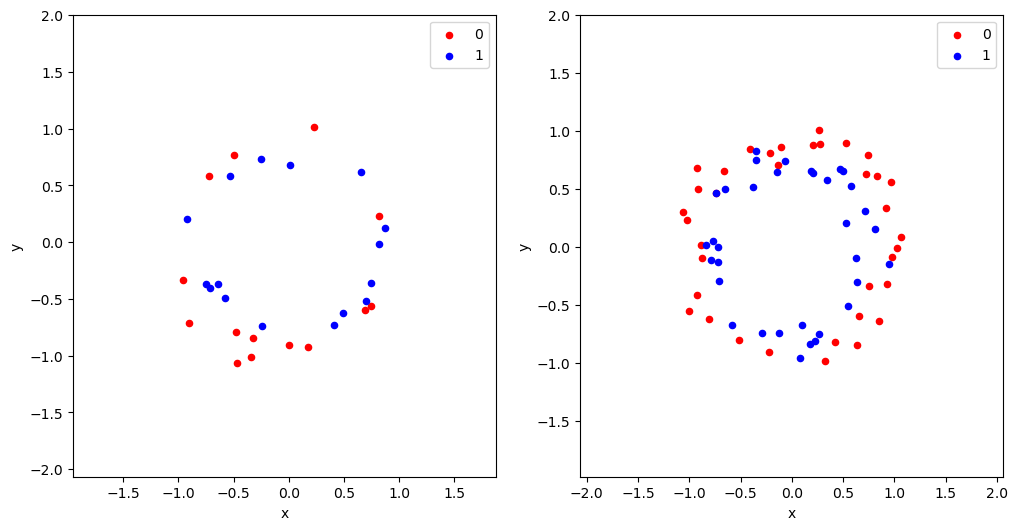

In [25]:
grouded_train = pd.DataFrame(dict(x=x_train[:, 0], y=x_train[:, 1], label=y_train))
grouped_test = pd.DataFrame(dict(x=x_test[:, 0], y=x_test[:, 1], label=y_test))
grouped_train = grouded_train.groupby("label")
grouped_test = grouped_test.groupby("label")

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for key, group in grouped_train:
    group.plot(ax=axs[0], kind="scatter", x="x", y="y", label=key, color=colors[key])
for key, group in grouped_test:
    group.plot(ax=axs[1], kind="scatter", x="x", y="y", label=key, color=colors[key])

for dset, ax in zip([x_train, x_test], axs):
    x_min, x_max = dset[:, 0].min() - 1, dset[:, 0].max() + 1
    y_min, y_max = dset[:, 1].min() - 1, dset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0.5], linestyles="dashed")

## Dropout

Vamos a retomar uno de los ejemplos iniciales que realizamos en la introducción a Keras, en donde entrenamos un modelo de perceptrón multicapa para el pronóstico de la temperatura en la siguiente hora. En este caso, vamos a aplicar la técnica de dropout para evitar el sobreajuste del modelo.

In [26]:
# Descargamos los datos a usar
!mkdir data
!wget https://raw.githubusercontent.com/griverat/Meteo-AI/main/notebooks/data/campo_de_marte.csv -O data/campo_de_marte.csv

--2024-06-21 00:04:25--  https://raw.githubusercontent.com/griverat/Meteo-AI/main/notebooks/data/campo_de_marte.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135270 (132K) [text/plain]
Saving to: ‘data/campo_de_marte.csv’

data/campo_de_marte 100%[===================>] 132.10K  --.-KB/s    in 0.01s   

2024-06-21 00:04:25 (8.78 MB/s) - ‘data/campo_de_marte.csv’ saved [135270/135270]



In [27]:
station_data = pd.read_csv("data/campo_de_marte.csv", skiprows=10)

# renombramos las columnas a algo más amigable
station_data.columns = [
    "date",
    "hour",
    "temp",
    "precip",
    "humidity",
    "wind_dir",
    "wind_speed",
]

# combinamos las columnas de fecha y hora en una sola
station_data["date"] = pd.to_datetime(station_data["date"] + " " + station_data["hour"])
station_data = station_data.drop(columns=["hour"])

# convertimos las columnas de temperatura, precipitación, humedad y velocidad del viento a números
station_data["temp"] = pd.to_numeric(
    station_data["temp"], errors="coerce", downcast="float"
)
station_data["precip"] = pd.to_numeric(
    station_data["precip"], errors="coerce", downcast="float"
)
station_data["humidity"] = pd.to_numeric(
    station_data["humidity"], errors="coerce", downcast="float"
)
station_data["wind_dir"] = pd.to_numeric(
    station_data["wind_dir"], errors="coerce", downcast="float"
)
station_data["wind_speed"] = pd.to_numeric(
    station_data["wind_speed"], errors="coerce", downcast="float"
)

# eliminamos las filas con valores faltantes
station_data = station_data.dropna()
station_data.head()

,date,temp,precip,humidity,wind_dir,wind_speed
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2


In [28]:
station_data["next_temp"] = station_data["temp"].shift(-1)
station_data = station_data.dropna()
station_data

,date,temp,precip,humidity,wind_dir,wind_speed,next_temp
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7,21.400000
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6,21.200001
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2,21.299999
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8,21.200001
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2,21.200001
...,...,...,...,...,...,...,...
3639,2024-05-31 18:00:00,15.000000,0.0,94.0,241.0,0.7,15.100000
3640,2024-05-31 19:00:00,15.100000,0.0,94.0,248.0,0.7,15.000000
3641,2024-05-31 20:00:00,15.000000,0.0,94.0,247.0,0.5,14.900000
3642,2024-05-31 21:00:00,14.900000,0.0,95.0,243.0,1.0,14.800000


Hasta este punto hemos copiado el código que usamos en la primera sesión para cargar los datos y preprocesarlos.
En esta oportunidad, vamos a agregar dos datos adicionales de entrada que sera el Mes, el Dia y la Hora de la medición en forma de armónicos. Esto ayudara al modelo a capturar la estacionalidad de los datos.

In [29]:
station_data["hour_sin"] = np.sin(2 * np.pi / (station_data.date.dt.hour + 1e-3))
station_data["hour_cos"] = np.cos(2 * np.pi / (station_data.date.dt.hour + 1e-3))

station_data["day_sin"] = np.sin(2 * np.pi / station_data.date.dt.day_of_year)
station_data["day_cos"] = np.cos(2 * np.pi / station_data.date.dt.day_of_year)

station_data["month_sin"] = np.sin(2 * np.pi / station_data.date.dt.month)
station_data["month_cos"] = np.cos(2 * np.pi / station_data.date.dt.month)

In [30]:
station_data.head()

,date,temp,precip,humidity,wind_dir,wind_speed,next_temp,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2024-01-01 00:00:00,21.500000,0.0,87.0,247.0,1.7,21.400000,-6.428333e-13,1.000000,-2.449294e-16,1.0,-2.449294e-16,1.0
1,2024-01-01 01:00:00,21.400000,0.0,88.0,249.0,1.6,21.200001,-6.276867e-03,0.999980,-2.449294e-16,1.0,-2.449294e-16,1.0
2,2024-01-01 02:00:00,21.200001,0.0,88.0,253.0,1.2,21.299999,1.570011e-03,-0.999999,-2.449294e-16,1.0,-2.449294e-16,1.0
3,2024-01-01 03:00:00,21.299999,0.0,88.0,242.0,0.8,21.200001,8.663741e-01,-0.499395,-2.449294e-16,1.0,-2.449294e-16,1.0
4,2024-01-01 04:00:00,21.200001,0.0,89.0,233.0,1.2,21.200001,9.999999e-01,0.000393,-2.449294e-16,1.0,-2.449294e-16,1.0


In [31]:
train_size = int(len(station_data) * 0.7)
val_size = int(len(station_data) * 0.15)
test_size = len(station_data) - train_size - val_size

input_vars = [
    "temp",
    "humidity",
    "wind_speed",
    "hour_sin",
    "hour_cos",
    "day_sin",
    "day_cos",
    "month_sin",
    "month_cos",
]

train_data = station_data[input_vars].iloc[:train_size]
train_label = station_data["next_temp"].iloc[:train_size]

val_data = station_data[input_vars].iloc[train_size : train_size + val_size]
val_label = station_data["next_temp"].iloc[train_size : train_size + val_size]

test_data = station_data[input_vars].iloc[train_size + val_size :]
test_label = station_data["next_temp"].iloc[train_size + val_size :]

In [32]:
mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

Ahora creamos nuestra red neuronal sin dropout como linea base.

In [33]:
model_baseline = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model_baseline.build(input_shape=(None, len(input_vars)))

model_baseline.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model_baseline.fit(
    train_data_standarized,
    train_label,
    epochs=100,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 237.0148 - mae: 12.5363 - val_loss: 17.2371 - val_mae: 3.3106
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9449 - mae: 1.5759 - val_loss: 4.4880 - val_mae: 1.6895
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2193 - mae: 0.8285 - val_loss: 2.3616 - val_mae: 1.2041
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7456 - mae: 0.6516 - val_loss: 2.0523 - val_mae: 1.1399
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5941 - mae: 0.5859 - val_loss: 1.3953 - val_mae: 0.9162
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5670 - mae: 0.5614 - val_loss: 1.3590 - val_mae: 0.9182
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5113 - mae: 0.5425 - val_loss: 1.3661 - val_mae: 0.9358
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5023 - mae: 0.5370 - val_loss: 1.1846 - val_mae: 0.8617
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0

Evaluamos el rendimiento del modelo y visualizamos las métricas de entrenamiento.

Text(0.5, 1.0, 'mae')

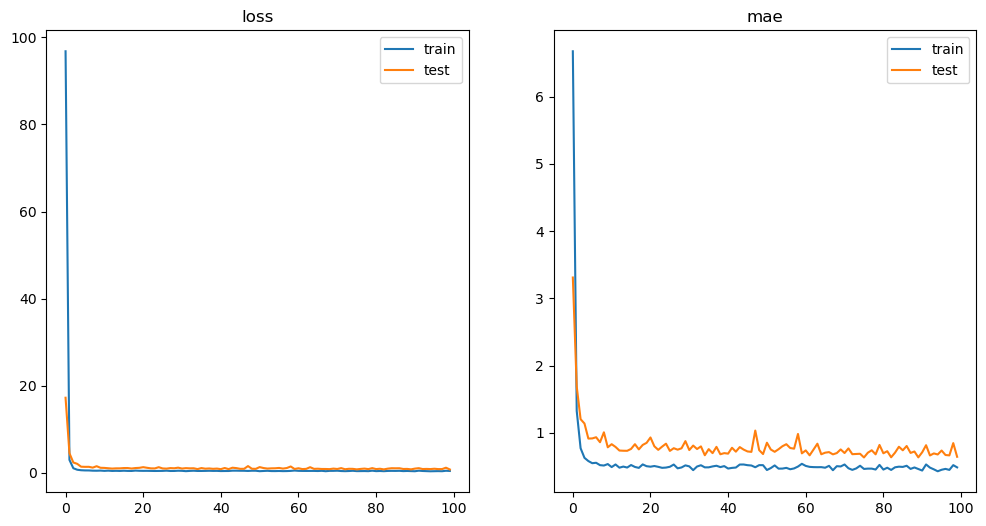

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

Ahora revisamos que tan preciso es el modelo en la predicción de la temperatura.

Baseline MAE: 0.77
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


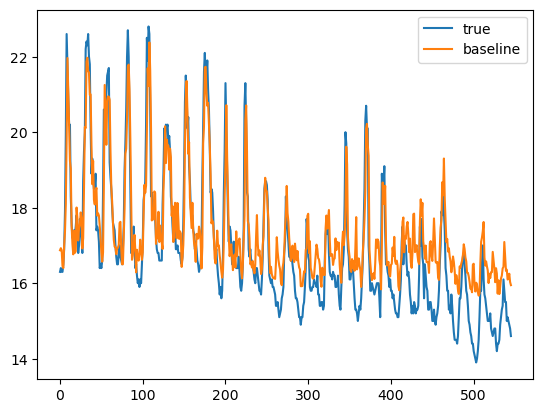

In [35]:
_, baseline_mae = model_baseline.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Baseline MAE: {baseline_mae:.2f}")
preds_baseline = model_baseline.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds_baseline, label="baseline")
ax.legend()

Ahora definiremos nuestra red neuronal con dropout en la capa oculta.

In [36]:
model_dropout = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1),
    ]
)
model_dropout.build(input_shape=(None, len(input_vars)))

model_dropout.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model_dropout.fit(
    train_data_standarized,
    train_label,
    epochs=100,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 246.2513 - mae: 12.9156 - val_loss: 14.0667 - val_mae: 3.0374
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8852 - mae: 2.6441 - val_loss: 6.1231 - val_mae: 2.0531
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2186 - mae: 2.1655 - val_loss: 1.6431 - val_mae: 0.9445
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6060 - mae: 2.0376 - val_loss: 1.6354 - val_mae: 0.9699
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8503 - mae: 1.8919 - val_loss: 1.4771 - val_mae: 0.9422
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4442 - mae: 1.8690 - val_loss: 3.0878 - val_mae: 1.5265
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6441 - mae: 1.8803 - val_loss: 1.2817 - val_mae: 0.8421
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5860 - mae: 1.8692 - val_loss: 1.1006 - val_mae: 0.7736
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

Text(0.5, 1.0, 'mae')

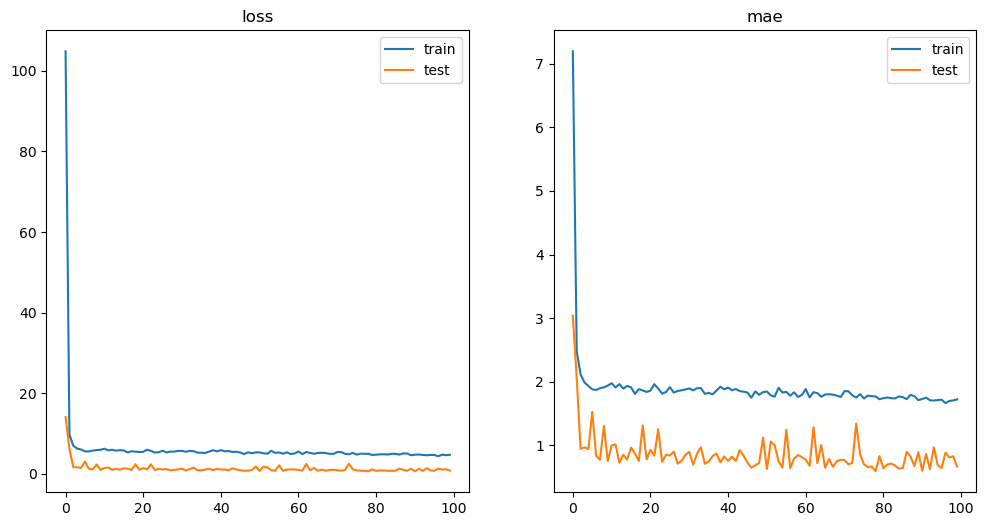

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

Dropout MAE: 0.66
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


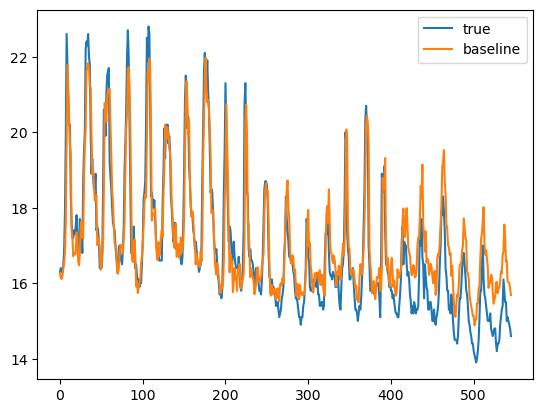

In [38]:
_, dropout_mae = model_dropout.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Dropout MAE: {dropout_mae:.2f}")
preds_dropout = model_dropout.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds_dropout, label="baseline")
ax.legend()

Dropout MAE: 0.66
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


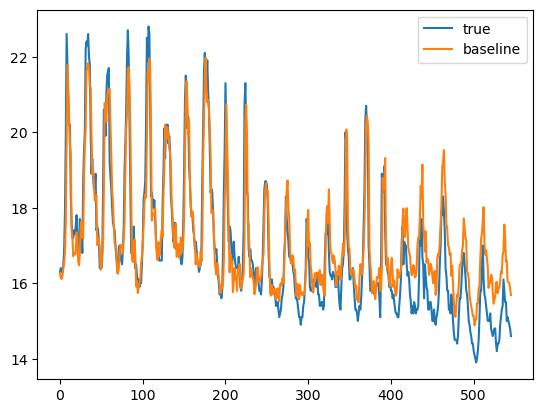

In [39]:
_, dropout_mae = model_dropout.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Dropout MAE: {dropout_mae:.2f}")
preds_dropout = model_dropout.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds_dropout, label="baseline")
ax.legend()

Podemos observar como nuestro modelo con dropout logra generalizar mejor a los datos de prueba, lo que se refleja en una menor pérdida y un mayor rendimiento en la métrica de precisión.

## Early stopping

El entrenamiento de un modelo de Machine Learning puede ser un proceso costoso en términos de tiempo y recursos computacionales. Por esta razón, es importante tener en cuenta estrategias para detener el entrenamiento de un modelo cuando ya no se observa una mejora significativa en su rendimiento.

Una de las estrategias más comunes para detener el entrenamiento de un modelo es el uso de la técnica de early stopping. Esta técnica consiste en monitorear una métrica de rendimiento, como la pérdida en el conjunto de validación, y detener el entrenamiento del modelo cuando la métrica deja de mejorar.

En Keras, la técnica de early stopping se puede implementar utilizando el callback `EarlyStopping`. Este callback permite especificar la métrica a monitorear, el número de épocas para esperar antes de detener el entrenamiento y otras opciones como la paciencia y el modo de monitoreo.

```python
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min')
```

Para este ejemplo vamos a usar una configuracion la misma cantidad de neuronas usadas en los ejemplos anteriores, pero con una cantidad de epocas de entrenamiento de 1000.

In [40]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model.build(input_shape=(None, len(input_vars)))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

Definimos el callback de early stopping y lo agregamos a la lista de callbacks al entrenar el modelo.

In [41]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
]
history = model.fit(
    train_data_standarized,
    train_label,
    epochs=1000,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255.4694 - mae: 13.1177 - val_loss: 19.0696 - val_mae: 3.5595
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4980 - mae: 1.6653 - val_loss: 4.9598 - val_mae: 1.8109
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4549 - mae: 0.9358 - val_loss: 2.7818 - val_mae: 1.3371
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8887 - mae: 0.7145 - val_loss: 2.3186 - val_mae: 1.2615
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7538 - mae: 0.6613 - val_loss: 1.7770 - val_mae: 1.0861
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7038 - mae: 0.6519 - val_loss: 1.3748 - val_mae: 0.9501
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5925 - mae: 0.5771 - val_loss: 1.3508 - val_mae: 0.9416
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5091 - mae: 0.5469 - val_loss: 1.0637 - val_mae: 0.7675
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Podemos observar como el modelo se detiene antes de las 100 épocas, ya que no se observa una mejora significativa en la pérdida en el conjunto de validación.

Text(0.5, 1.0, 'mae')

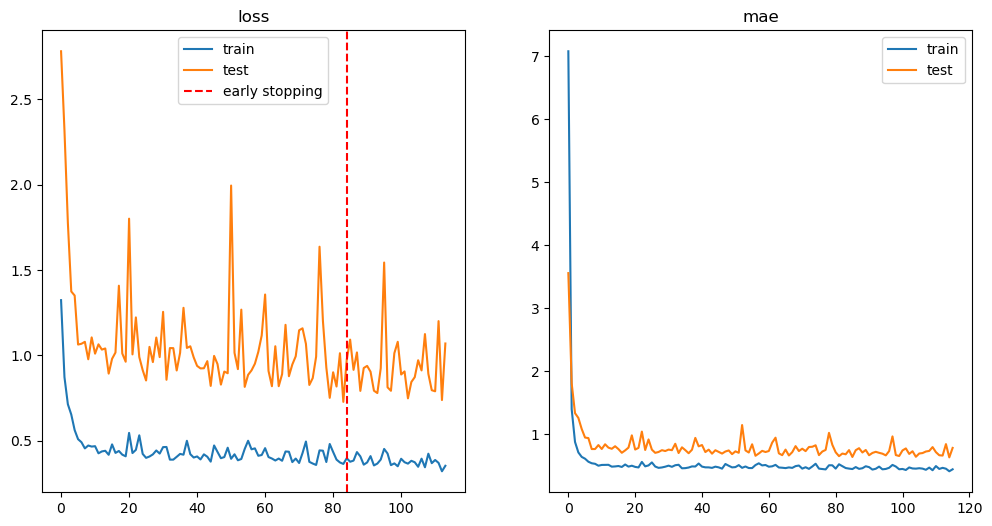

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"][2:], label="train")
ax[0].plot(history.history["val_loss"][2:], label="test")
ax[0].axvline(
    x=len(history.history["loss"][2:]) - 30,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

Test MAE: 0.87
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


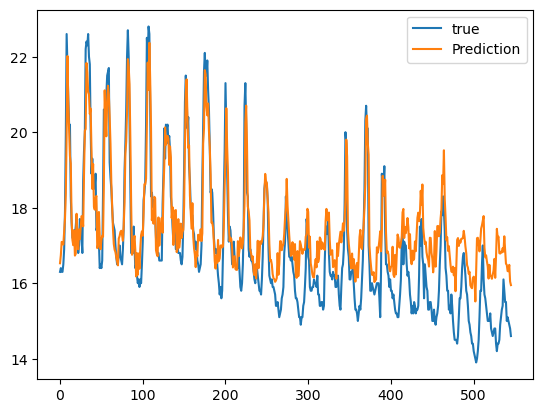

In [43]:
_, mae = model.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Test MAE: {mae:.2f}")
preds = model.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds, label="Prediction")
ax.legend()

En general, es recomendable el uso de Early Stopping en todo momento para evitar el sobreajuste de los modelos y reducir el tiempo de entrenamiento. Sin embargo, es importante tener en cuenta que el uso de Early Stopping puede llevar a detener el entrenamiento antes de que el modelo haya convergido completamente, por lo que es importante ajustar los parámetros de paciencia y modo de monitoreo para obtener los mejores resultados.

### Ejercicio

Usando la misma configuracion del modelo anterior, modifique los parametros de early stopping para que:

- Monitoree la métrica de mae en el conjunto de validación.
- Comience a monitorear después de 50 épocas.

Para ello, puede consultar la [documentación](https://keras.io/api/callbacks/early_stopping/) de Keras sobre el callback `EarlyStopping` para ver cómo configurar los parámetros adecuadamente.

In [44]:
# code here
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model.build(input_shape=(None, len(input_vars)))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=10, restore_best_weights=True, start_from_epoch=50
    )
]
history = model.fit(
    train_data_standarized,
    train_label,
    epochs=1000,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 265.1742 - mae: 13.5069 - val_loss: 14.1408 - val_mae: 3.0493
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9787 - mae: 1.5528 - val_loss: 3.8869 - val_mae: 1.5703
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3126 - mae: 0.8912 - val_loss: 2.3260 - val_mae: 1.2123
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7790 - mae: 0.6646 - val_loss: 1.4747 - val_mae: 0.9112
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6611 - mae: 0.6142 - val_loss: 1.5287 - val_mae: 0.9897
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5219 - mae: 0.5494 - val_loss: 1.5235 - val_mae: 0.9951
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4672 - mae: 0.5153 - val_loss: 1.3054 - val_mae: 0.8908
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5260 - mae: 0.5471 - val_loss: 1.1924 - val_mae: 0.8306
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Text(0.5, 1.0, 'mae')

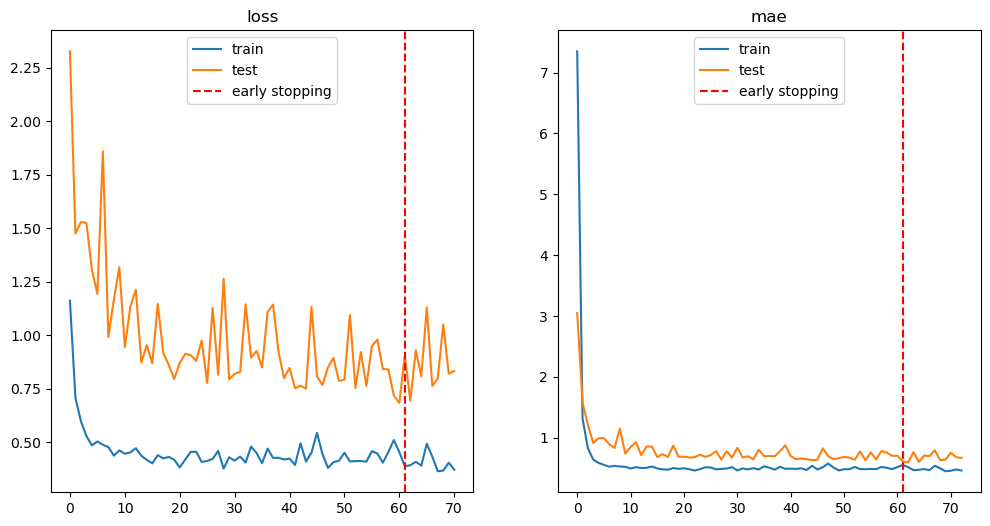

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"][2:], label="train")
ax[0].plot(history.history["val_loss"][2:], label="test")
ax[0].axvline(
    x=len(history.history["loss"][2:]) - 10,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].axvline(
    x=len(history.history["val_mae"][2:]) - 10,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[1].legend()
ax[1].set_title("mae")

Test MAE: 0.96
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


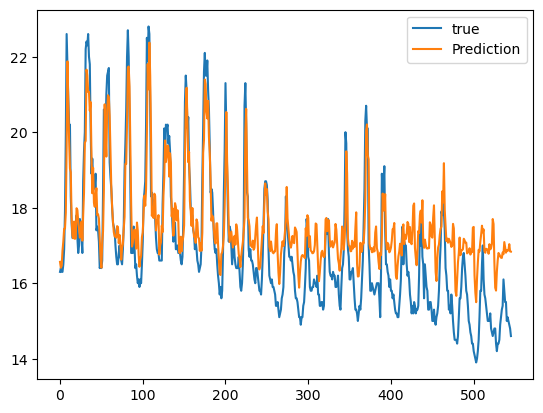

In [46]:
_, mae = model.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Test MAE: {mae:.2f}")
preds = model.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds, label="Prediction")
ax.legend()

## Batch normalization

Batch normalization es una técnica utilizada en redes neuronales para normalizar las activaciones de una capa oculta en mini-batches de datos. Esto ayuda a estabilizar y acelerar el entrenamiento de la red, ya que evita que las activaciones se vuelvan demasiado grandes o pequeñas, lo que puede llevar a problemas de convergencia y desvanecimiento del gradiente.

En Keras, la capa de batch normalization se puede agregar a un modelo utilizando la clase `BatchNormalization`. Esta capa se puede agregar después de una capa de activación en una red neuronal y normaliza las activaciones de la capa anterior en mini-batches de datos.

```python
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])
```

Nuevamente, usando la configuracion de la red neuronal anterior, vamos a agregar una capa de batch normalization después de la capa de activación en la red neuronal.

In [47]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1),
    ]
)
model.build(input_shape=(None, len(input_vars)))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [48]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
]
history = model.fit(
    train_data_standarized,
    train_label,
    epochs=1000,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
    callbacks=callbacks,
)

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 560.6140 - mae: 23.6319 - val_loss: 310.3390 - val_mae: 17.5013
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352.7163 - mae: 18.6284 - val_loss: 110.9927 - val_mae: 10.4403
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.6279 - mae: 8.7421 - val_loss: 4.4589 - val_mae: 1.7490
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3814 - mae: 1.7441 - val_loss: 1.6294 - val_mae: 1.0597
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1215 - mae: 0.8437 - val_loss: 1.1944 - val_mae: 0.8969
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8945 - mae: 0.7352 - val_loss: 0.9455 - val_mae: 0.7706
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8290 - mae: 0.7123 - val_loss: 0.7671 - val_mae: 0.6676
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9591 - mae: 0.7637 - val_loss: 0.6658 - val_mae: 0.5857
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 

Text(0.5, 1.0, 'mae')

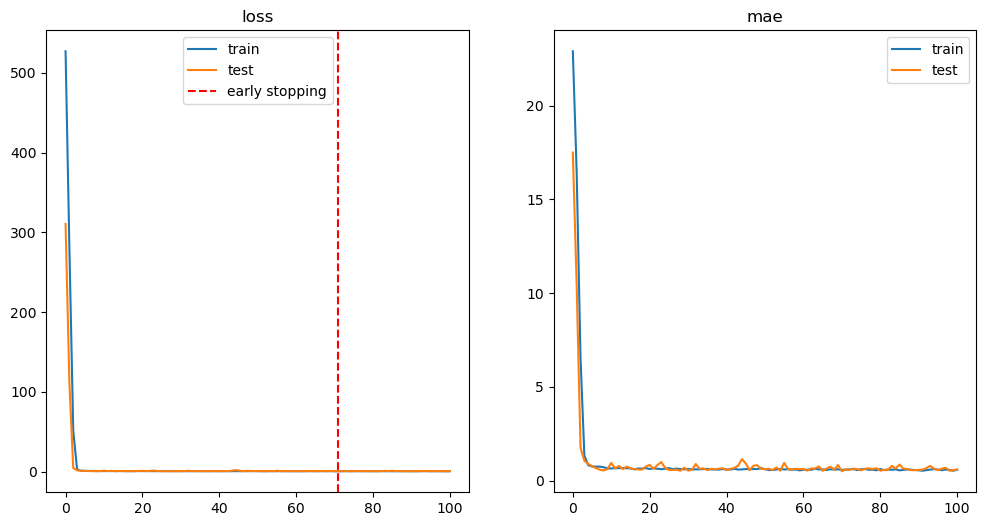

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].axvline(
    x=len(history.history["loss"]) - 30,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

Test MAE: 0.38
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


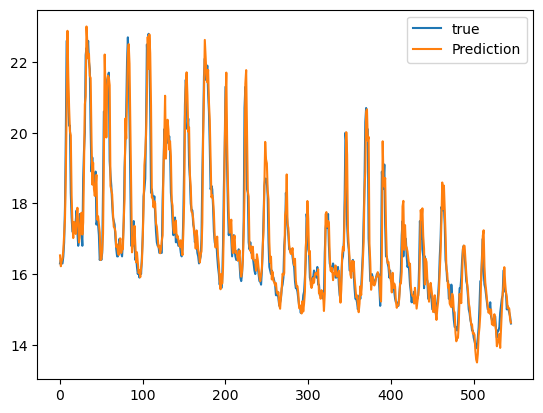

In [50]:
_, mae = model.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Test MAE: {mae:.2f}")
preds = model.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds, label="Prediction")
ax.legend()

**¿Cómo afecta la capa de batch normalization al rendimiento del modelo?**

Podemos observar cómo la capa de batch normalization ayuda a estabilizar y acelerar el entrenamiento de la red, lo que se refleja en una menor pérdida y un mayor rendimiento en la métrica de precisión.

## Ejercicio

Modifique la red neuronal anterior para usar la capa de batch normalization solamente después de la capa de entrada. ¿Cómo afecta esto al rendimiento del modelo?

Ahora intente combinar la capa de batch normalization con la técnica de dropout en la red neuronal. ¿Cómo afecta esto al rendimiento del modelo? ¿El orden en que se aplican las técnicas afecta al rendimiento del modelo?

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 149.1379 - mae: 9.1079 - val_loss: 269.8041 - val_mae: 16.2520
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9313 - mae: 1.7163 - val_loss: 199.5445 - val_mae: 13.9617
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5699 - mae: 1.4969 - val_loss: 123.8080 - val_mae: 10.9867
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9354 - mae: 1.5595 - val_loss: 59.0550 - val_mae: 7.5696
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6011 - mae: 1.2603 - val_loss: 17.4248 - val_mae: 3.9721
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6063 - mae: 1.2650 - val_loss: 5.7724 - val_mae: 2.1710
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7957 - mae: 1.0693 - val_loss: 2.1492 - val_mae: 1.2296
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2113 - mae: 1.1516 - val_loss: 1.9107 - val_mae: 1.1049
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 

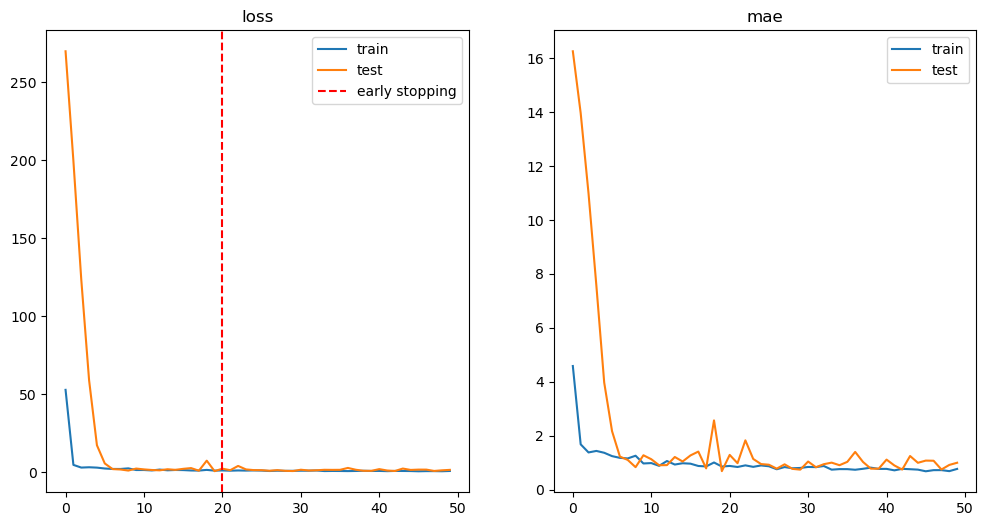

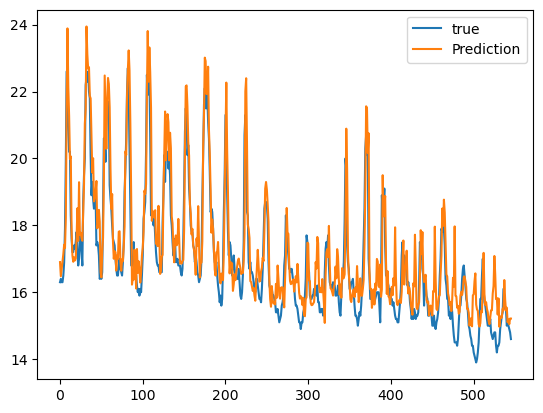

In [52]:
# code here
# Batch Norm despues de la capa de entrada
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)
model.build(input_shape=(None, len(input_vars)))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
]
history = model.fit(
    train_data_standarized,
    train_label,
    epochs=1000,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
    callbacks=callbacks,
)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].axvline(
    x=len(history.history["loss"]) - 30,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

_, mae = model.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Test MAE: {mae:.2f}")
preds = model.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds, label="Prediction")
ax.legend()

El MAE es 0.67 en este caso, mayor al MAE obtenido al aplicar batch normalization después de cada capa del modelo. Esto sugiere que la aplicación de batch normalization después de cada capa puede ayudar a estabilizar y acelerar el entrenamiento de la red, lo que se refleja en un mejor rendimiento en la métrica de MAE.

Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 569.0631 - mae: 23.7579 - val_loss: 361.5652 - val_mae: 18.9175
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 466.8395 - mae: 21.4991 - val_loss: 240.9598 - val_mae: 15.4346
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 295.0804 - mae: 16.9011 - val_loss: 77.5164 - val_mae: 8.6852
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.5862 - mae: 9.5945 - val_loss: 15.4377 - val_mae: 3.7276
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.9627 - mae: 4.4915 - val_loss: 3.6374 - val_mae: 1.3350
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.9202 - mae: 3.4801 - val_loss: 1.7136 - val_mae: 0.9836
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8060 - mae: 3.4736 - val_loss: 2.2537 - val_mae: 1.2761
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2324 - mae: 3.3070 - val_loss: 1.6562 - val_mae: 1.0683
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━

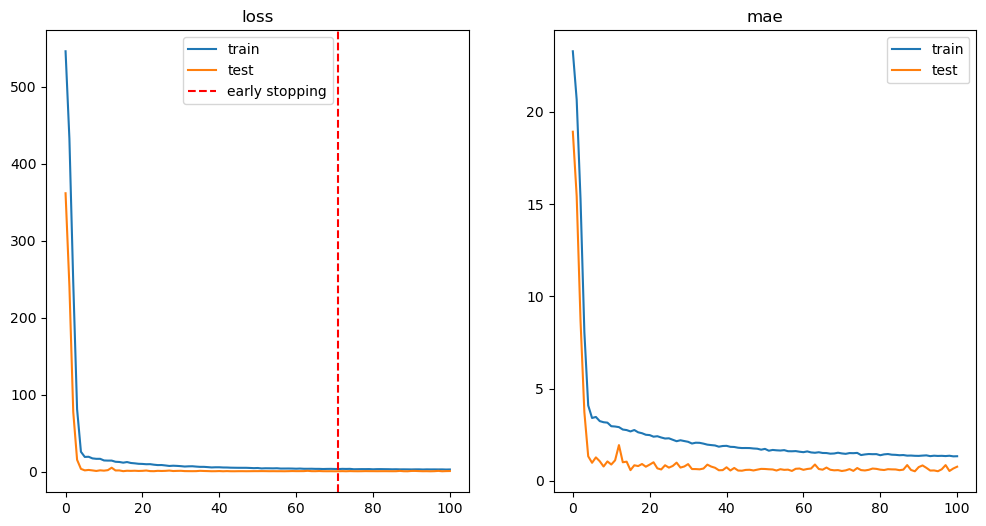

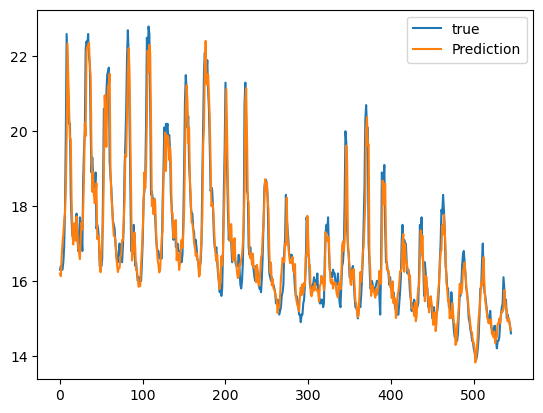

In [53]:
# combinando batch norm con dropout
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1),
    ]
)
model.build(input_shape=(None, len(input_vars)))
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=30, restore_best_weights=True
    )
]
history = model.fit(
    train_data_standarized,
    train_label,
    epochs=1000,
    validation_data=(val_data_standarized, val_label),
    verbose=1,
    callbacks=callbacks,
)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(history.history["loss"], label="train")
ax[0].plot(history.history["val_loss"], label="test")
ax[0].axvline(
    x=len(history.history["loss"]) - 30,
    color="red",
    linestyle="--",
    label="early stopping",
)
ax[0].legend()
ax[0].set_title("loss")

ax[1].plot(history.history["mae"], label="train")
ax[1].plot(history.history["val_mae"], label="test")
ax[1].legend()
ax[1].set_title("mae")

_, mae = model.evaluate(test_data_standarized, test_label, verbose=0)
print(f"Test MAE: {mae:.2f}")
preds = model.predict(test_data_standarized)

fig, ax = plt.subplots()
ax.plot(test_label.values, label="true")
ax.plot(preds, label="Prediction")
ax.legend()

Usando solo una capa de dropout con p=0.5 vemos que el resultado del modelo es mejor al combinarlo con batch normalization, lo que sugiere que la aplicación de dropout puede ayudar a evitar el sobreajuste del modelo y mejorar su capacidad de generalización. Tener en cuenta que solo se uso dropout en la ultima capa de batch normalization, si se hubiera usado en todas las capas, el resultado podria haber sido distinto.